1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
## Virgínica y Setosa
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
## 0.9333 y 0.9, respectivamente
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
## Sí, el score aumenta. Los resultados no varían.
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
## si, el score se normaliza en 0.9
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?
## Sí, al ser un conjunto de datos pequeño

In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
iris = pd.read_csv('data\iris.csv')

In [6]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
X = np.array(iris[iris.columns.difference(['variety'])])
y = np.array(iris['variety'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=343)

In [9]:
k = [3, 7]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score_test = knn.score(X_test, y_test)
    print(f'score_test {i} =',score_test)


score_test 3 = 0.9333333333333333
score_test 7 = 0.9


In [10]:
X2 = np.array([15.7,2.8,9.5,0.1]).reshape(1, -1)
X3 = np.array([1.7,3.8,4.5,11.3]).reshape(1, -1)

In [11]:
knn.predict(X2)

array(['Virginica'], dtype=object)

In [12]:
knn.predict(X3)

array(['Setosa'], dtype=object)

([<matplotlib.axis.XTick at 0x212d9aa63a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

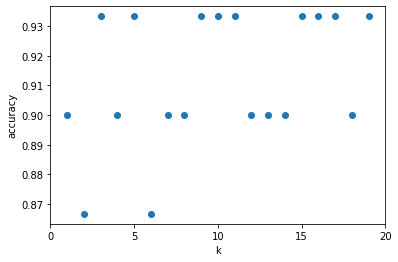

In [13]:
k_range = range(1, 20)
scores = []
for i in k_range:
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, y_train)
    scores.append(knn2.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size= 0.60, random_state=343)

In [15]:
k = [3, 7]
for i in k:
    knn3 = KNeighborsClassifier(n_neighbors=i)
    knn3.fit(X_train2, y_train2)
    score_test2 = knn3.score(X_test2, y_test2)
    print(f'score_test {i} =',score_test2)

score_test 3 = 0.9666666666666667
score_test 7 = 0.9777777777777777


In [16]:
print(knn3.predict(X2))
print(knn3.predict(X3))

['Virginica']
['Setosa']


In [17]:
iris2 = iris.drop(iris[iris.variety == 'Setosa'].index)

In [19]:
X4 = np.array(iris[iris.columns.difference(['variety'])])
y4 = np.array(iris['variety'])
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size= 0.20, random_state=343)
k = [3, 7]
for i in k:
    knn4 = KNeighborsClassifier(n_neighbors=i)
    knn4.fit(X_train4, y_train4)
    score_test4 = knn.score(X_test4, y_test4)
    prob_test4 = knn.score(X_test4, y_test4)
    print(f'score_test {i} =',score_test4)


score_test 3 = 0.9
score_test 7 = 0.9


In [16]:
print(knn4.predict(X2))
print(knn4.predict(X3))

['Virginica']
['Setosa']
